<a href="https://colab.research.google.com/github/ericzizzi/M3B-Polito/blob/master/didattica/BM/gromacs/gromacs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
#@title Installing GROMACS
!apt install gromacs &> /dev/null

In [2]:
#@title Install NGLView
!pip install nglview &> /dev/null

In [ ]:
#@title Install py3Dmol
#Here, write down the code to install py3Dmol
!pip install py3Dmol
#And we already learned how to import these modules, right?
import py3Dmol

# Introduction

GROMACS is a major free, open-source, and fast code developed for Molecular Dynamics (MD) simulations. Its continuous updates (1 major release/year), speed, efficiency and flexibility, along with the inbuilt availability of force fields specific for proteins, make it one of the most popular choices for biomolecular simulations.
(http://www.gromacs.org/).

To see what gromacs version is installed on your PC:

In [ ]:
!gmx -version

                         :-) GROMACS - gmx, 2018.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS develo

All gromacs commands can be used with the syntax:
```
gmx <command>
```
And all the commands have a help message that can be displayed using the option “-h”, e.g.:
```
$ gmx pdb2gmx -h
```
For basic and advanced GROMACS tutorial, please visit: http://www.mdtutorials.com/gmx/


## Files and suggested directory tree
You will need the following files to run a simulation:
1. Atom coordinates: *.pdb (or *.gro)
2. Topology file: *.top
3. MD parameters: *.mdp

The pdb file (penetratin.pdb) and *.mdp files are required input files, i.e. you have to make sure you have them and tell GROMACS where to find them! The topology (topol.top) file on the other hand will be generated by GROMACS once you select the forcefield. We suggest you create a new folder for each simulation you run, put
all the necessary files into the simulation folder itself, and let GROMACS write into that same folder. 

Keep in mind that GROMACS is a command-line program: if you don’t specify the full paths to the required input files, but only the file name (example call: $ gmx make_ndx -s struct.tpr -o index.ndx ), GROMACS will expect the input file (struct.tpr) to be in the folder you’re calling it from, and will write the output file (index.ndx) into the same current folder. If struct.tpr is not in the current folder, GROMACS will throw an error and fail! GROMACS error messages are pretty explicit, so chances are READING THE ERROR is enough to troubleshoot most issues (e.g. if a required file is missing).

## Molecule: Cell-Penetrating Peptide

The discovery of Cell-Penetrating Peptides (CPPs) represents an important breakthrough for the delivery of large cargo molecules or nanoparticles for several clinical applications. A main feature of CPPs is the ability to
penetrate the cell membrane at low micromolar concentrations in vivo and in vitro, without binding any chiralreceptors and without causing significant membrane damage. This ability offers significant therapeutic potential,
as targeting areas normally difficult to access for drugs.
TAT peptide and Drosophila Antennapedia homeodomain-derived penetratin peptide (pAntp) are the most
extensively studied CPPs. In particular, the pAntp is a 16-residues long cationic peptide derived from the third
helix of the homeodomain of the Drosohila transcription factor Antennapedia. This amphipatic CPP, largely
unstructured in solution, is positively charged at neutral pH (since it contains four lysine and three arginine
residues). Interestingly, the pAntp is able to cross biological membranes and enter a hydrophobic environment
upon interaction with negatively-charged molecules, like phosphatic acid (PA) or phosphatidylserine (PS).
However, mechanisms by which pAntp comes into the cells have not been completely understood. Proposed
mechanisms of pAntp cellular uptake hypothesize direct crossing of the peptide through the membrane at low
peptide concentrations (1μM) and an endocytotic pathway at high concentrations (10μM). Several studies have
suggested that pAntp amphiphilicity may not be enough to drive the membrane penetration, indicating instead
tryptophan as key player. Replacement of thryptophan by phenylanine resulted in a loss of penetration activity
when interacting with membranes and bicelles. Moreover, a recent computational work has characterized the
binding mode of pAntp-DPPC bilayers, proposing arginine, lysine and tryptophan as driving the penetration
mechanism.
This extraordinary ability of CPPs to penetrate cell membranes has brought to designate them as perfect
functionalization molecules for drug delivery systems.
For example, pAntp might be employed to decorate Magnetic Nanoparticles (MNPs), thus combining their
fascinating physico-chemical properties with a cell-penetrating ability to design novel effective therapeutic
strategies as well as innovative biotechnology methodologies. Size, biocompatibility and excellent magnetic
properties, have made MAG and Silica-coated MAG the object of a remarkable amount of research in the last
decade and numerous biomedical applications have been reported. Recently, MNPs combined with magnetic
fields were used to enable cell positioning under non-permissive conditions, local gene therapy and/or
optimization of MNP- assisted lentiviral gene transfer.
Functionalization strategies comprise grafting with organic molecules, including small organic biomolecules such
as CPPs, and/or coating with an inorganic layer (e.g., silica).
Design and properties prediction of functionalization strategies may be addressed by computational molecular
modelling. In this context, Kubiak-Ossowska and coworkers have recently employed computational modelling
to investigate the adsorption of TAT peptides onto three silica surface models. This work has suggested that TAT-
Silica adsorption mechanism is driven by electrostatic and hydrophobic interactions mainly involving arginine
residues and the nanoparticle surface.

## Molecular Dynamics (MD) Simulations

Briefly, the general workflow of an MD simulation with GROMACS is
divided in the following steps (see also “MD_FlowChart.pdf”):

1. System Preparation
> - Retrieve starting structure (e.g. RCSB)
> - GROMACS structure conversion (from pdb to gro*)
>- Topology (and position restraints) generation
>- System box generation and addition of water and ions

2. Energy Minimization
3. Simulation
> - (Equilibration: Molecular Dynamics Simulation normally with position restraints)
> - Production: Molecular Dynamics Simulation
4) Analysis of the Simulation

*note that both .gro and .pdb files both contain atomic coordinates and
only differ for minor aspects:
> - .gro coordinates are in nm, whereas *.pdb coordinates in Å
> - .gro file can contain also atoms’ velocities

GROMACS can work with both types of files and does not strictly need the .gro file format for most operations.
It can be however handy to have a .gro file, for example, to quickly extract the box vector.

*More on that later!*

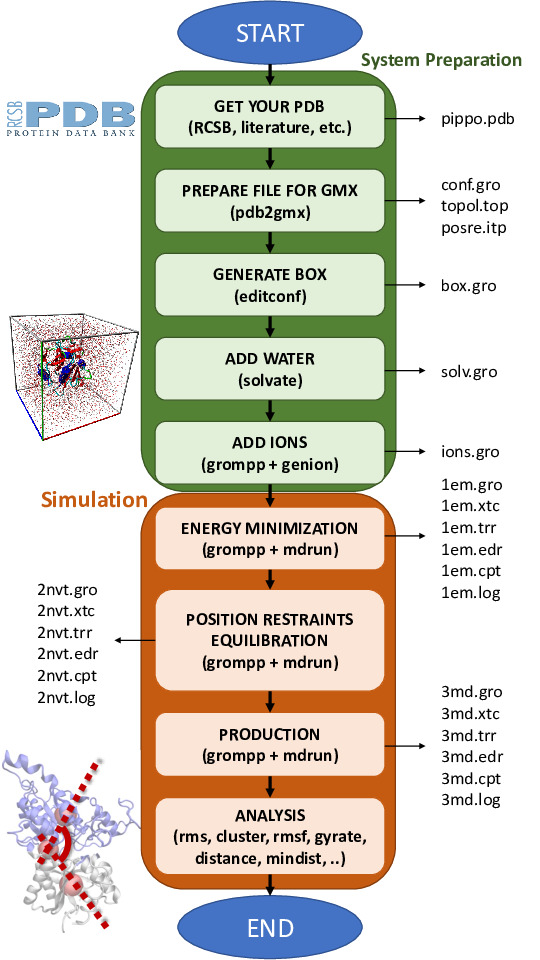

# STEP 1 – PDB conversion and system preparation

The file of interest for the present tutorial is called penetratin.pdb. 

In [ ]:
!wget https://files.rcsb.org/download/1AKI.pdb

--2022-03-31 10:19:47--  https://files.rcsb.org/download/1AKI.pdb
Resolving files.rcsb.org (files.rcsb.org)... 132.249.210.234
Connecting to files.rcsb.org (files.rcsb.org)|132.249.210.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/octet-stream]
Saving to: ‘1AKI.pdb’

1AKI.pdb                [   <=>              ] 113.59K   164KB/s    in 0.7s    

2022-03-31 10:19:48 (164 KB/s) - ‘1AKI.pdb’ saved [116316]



Using a visualization software (for example VMD, PyMol, UCSF Chimera, Schrödinger Maestro, MOE, ...) you can view and rotate the structure. Here we will use **py3Dmol** for semplicity.

In [ ]:
#@title Plot Structure
#First we assign the py3Dmol.view as view
view=py3Dmol.view()
#The following lines are used to add the addModel class
#to read the PDB files of chain B and C
view.addModel(open('1AKI.pdb', 'r').read(),'pdb')
#Zooming into all visualized structures 
view.zoomTo()
#Here we set the background color as white
view.setBackgroundColor('white')
#Here we set the visualization style for chain B and C
view.setStyle({'chain':'A'},{'cartoon': {'color':'purple'}})
#And we finally visualize the structures using the command below
view.show()

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

Let’s now have a look at the actual pdb file, which is nothing more than a text file!

In [ ]:
from google.colab.output import eval_js
eval_js('google.colab.output.setIframeHeight("400")')

!cat 1AKI.pdb

HEADER    HYDROLASE                               19-MAY-97   1AKI              
TITLE     THE STRUCTURE OF THE ORTHORHOMBIC FORM OF HEN EGG-WHITE               
TITLE    2 LYSOZYME AT 1.5 ANGSTROMS RESOLUTION                                 
COMPND    MOL_ID: 1;                                                            
COMPND   2 MOLECULE: LYSOZYME;                                                  
COMPND   3 CHAIN: A;                                                            
COMPND   4 EC: 3.2.1.17                                                         
SOURCE    MOL_ID: 1;                                                            
SOURCE   2 ORGANISM_SCIENTIFIC: GALLUS GALLUS;                                  
SOURCE   3 ORGANISM_COMMON: CHICKEN;                                            
SOURCE   4 ORGANISM_TAXID: 9031;                                                
SOURCE   5 CELL: EGG                                                            
KEYWDS    HYDROLASE, GLYCOSI

You will see that the pdb is essentially a space-separated text file organized into columns. 
Briefly:
- The first column defines the row type (e.g. REMARK tells you that this row is a comment, ATOM tells you that this row contains actual atomic coordinates, etc.).
- Columns 7, 8 and 9 contain the x,y,z coordinates of the atoms of the system.

For more information: https://www.cgl.ucsf.edu/chimera/docs/UsersGuide/tutorials/pdbintro.html.

##1.1 Make Index File (gmx make_ndx)


We now introduce a very powerful tool in GROMACS: index files. Index files are created starting from an atomic system (e.g. a pdb file), and split atoms into specific groups. These can be useful to restrict operations and analyses only to specific parts of the system, for example, if you want to see fluctuations of the alpha-Carbons only, you can select that specific group in the analysis tool.

To have detailed information about the command to make index files, just type:

In [ ]:
eval_js('google.colab.output.setIframeHeight("400")')

!gmx make_ndx -h

                     :-) GROMACS - gmx make_ndx, 2018.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS d

Let’s first create an index file (it will not be created by default when you launch the simulation!):

In [ ]:
eval_js('google.colab.output.setIframeHeight("400")')

!gmx make_ndx -f 1AKI.pdb -o index.ndx

                     :-) GROMACS - gmx make_ndx, 2018.1 (-:

                            GROMACS is written by:
     Emile Apol      Rossen Apostolov      Paul Bauer     Herman J.C. Berendsen
    Par Bjelkmar    Aldert van Buuren   Rudi van Drunen     Anton Feenstra  
  Gerrit Groenhof    Aleksei Iupinov   Christoph Junghans   Anca Hamuraru   
 Vincent Hindriksen Dimitrios Karkoulis    Peter Kasson        Jiri Kraus    
  Carsten Kutzner      Per Larsson      Justin A. Lemkul    Viveca Lindahl  
  Magnus Lundborg   Pieter Meulenhoff    Erik Marklund      Teemu Murtola   
    Szilard Pall       Sander Pronk      Roland Schulz     Alexey Shvetsov  
   Michael Shirts     Alfons Sijbers     Peter Tieleman    Teemu Virolainen 
 Christian Wennberg    Maarten Wolf   
                           and the project leaders:
        Mark Abraham, Berk Hess, Erik Lindahl, and David van der Spoel

Copyright (c) 1991-2000, University of Groningen, The Netherlands.
Copyright (c) 2001-2017, The GROMACS d

You will see that make_ndx will read the pdb file (option “-f”), create some default groups and then wait for your input. 

You can manually add groups by typing the atoms manually (we will see the selection syntax later on...), or simply accept the default groups and save them by typing q and hitting Enter. The final index file (index.ndx) will be saved with the name chosen in the option “-o”.

**QUESTION❓:** 

**📚HOMEWORK:**

**😱WTF:**

**⚠️CAUTION:**